In [2]:
import os
import pandas as pd

In [3]:
files = list(x for x in os.listdir("./data") if 'csv' in x)
df_final = pd.DataFrame(columns = ["cost","method",'instance'])
for f in files:
    df = pd.read_csv(f"./data/{f}",sep=";")

    df_temp = pd.DataFrame(columns = ["cost","method","instance"])
    df_temp['cost'] = df["ObjectiveValue"]
    df_temp['method'] = [(
        f.replace(".csv","")
        .replace("Local_Search___","")
        .replace("Random_Solution__","Random, ")
        .replace("Nearest_Neighbor__Any_Position___","NN (Any), ")
        .replace("edge_swap__","swap edges, ")
        .replace("node_swap__","swap nodes, ")
        .replace("-TSPA","").replace("-TSPB","")
        )]*len(df_temp)
    df_temp['instance'] = [f.split('-')[-1].split(".")[0]]*len(df_temp)
    df_final = pd.concat([df_final,df_temp])
df_final

/tmp/ipykernel_4928/2373384861.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final = pd.concat([df_final,df_temp])


,cost,method,instance
0,48272.0,"Random, swap edges, steepest",TSPB
1,47742.0,"Random, swap edges, steepest",TSPB
2,47870.0,"Random, swap edges, steepest",TSPB
3,47178.0,"Random, swap edges, steepest",TSPB
4,48546.0,"Random, swap edges, steepest",TSPB
...,...,...,...
195,75078.0,"Random, swap edges, greedy",TSPA
196,73530.0,"Random, swap edges, greedy",TSPA
197,76051.0,"Random, swap edges, greedy",TSPA
198,72339.0,"Random, swap edges, greedy",TSPA


TSPA
                           method       cost
0    NN (Any), swap edges, greedy  71160.660
1  NN (Any), swap edges, steepest  70968.505
2    NN (Any), swap nodes, greedy  72823.915
3  NN (Any), swap nodes, steepest  72827.830
4      Random, swap edges, greedy  73893.860
5    Random, swap edges, steepest  73823.245
6      Random, swap nodes, greedy  86371.590
7    Random, swap nodes, steepest  88208.550


Text(0.5, 0, 'Cost')

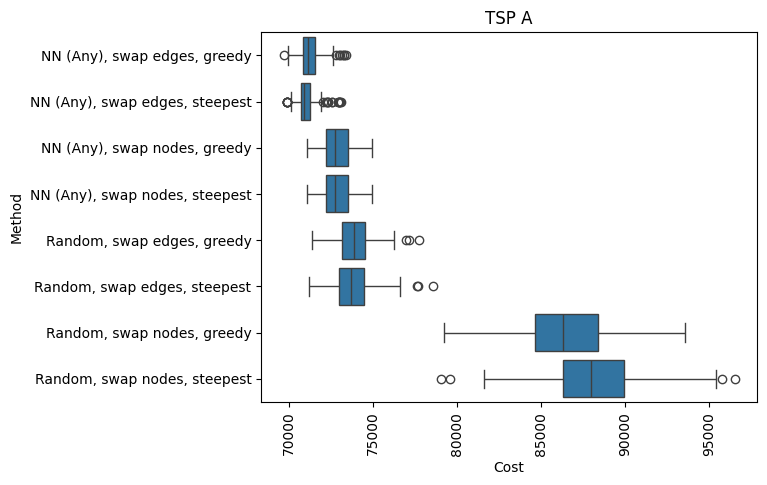

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

means = df_final[df_final['instance'] == "TSPA"].groupby(["method"])["cost"].mean().reset_index().sort_values(["method",'cost'])
print("TSPA")
print(means)

sns.boxplot(data = df_final[df_final['instance'] == "TSPA"],y="method",x="cost",order=means['method'])
plt.xticks(rotation=90)
plt.title("TSP A")
plt.ylabel("Method")
plt.xlabel("Cost")

TSPB
                           method       cost
0    NN (Any), swap edges, greedy  45036.680
1  NN (Any), swap edges, steepest  44974.885
2    NN (Any), swap nodes, greedy  45508.695
3  NN (Any), swap nodes, steepest  45477.295
4      Random, swap edges, greedy  48395.905
5    Random, swap edges, steepest  48416.080
6      Random, swap nodes, greedy  61062.765
7    Random, swap nodes, steepest  63113.235


Text(0.5, 0, 'Cost')

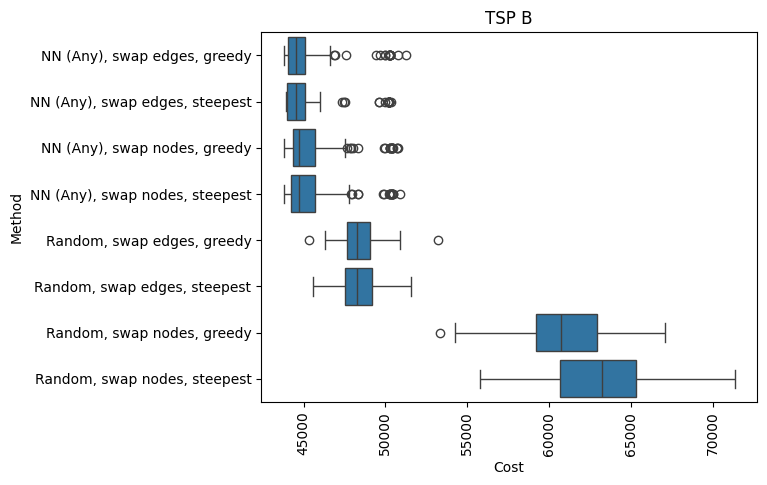

In [22]:
means = df_final[df_final['instance'] == "TSPB"].groupby(["method"])["cost"].mean().reset_index().sort_values(["method",'cost'])
print("TSPB")
print(means)

sns.boxplot(data = df_final[df_final['instance'] == "TSPB"],y="method",x="cost",order=means['method'])
plt.xticks(rotation=90)
plt.title("TSP B")
plt.ylabel("Method")
plt.xlabel("Cost")